# **Install the libraries**

In [1]:
!python.exe -m pip install --upgrade pip
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install scipy

# **Load the library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Load and Clean the data**

In [3]:
airBnbData = pd.read_csv('Listings.csv')
airBnbData

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.364350,4.943580,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.364070,4.893930,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.351500,4.896560,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.364200,4.928290,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.387610,4.891880,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,905666980733146256,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,16570501,Willemijn,NaN,De Baarsjes - Oud-West,52.362909,4.866164,Entire home/apt,500,2,0,NaN,NaN,1,17,0,0363 3B54 57D4 8994 D1D2
7604,905731222562001828,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,132654754,Atal,NaN,Osdorp,52.354460,4.791710,Entire home/apt,190,2,0,NaN,NaN,1,34,0,0363 8CA7 6BF7 EABB 76E1
7605,906161615984076237,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,23932215,Sabine,NaN,De Baarsjes - Oud-West,52.363597,4.858541,Entire home/apt,359,2,0,NaN,NaN,1,18,0,0363 DE11 2D1E E27B 04D1
7606,906312347067677212,Home in Amsterdam · ★New · 2 bedrooms · 2 beds...,4437313,Melianthe,NaN,Zuid,52.349906,4.860463,Entire home/apt,223,1,0,NaN,NaN,1,73,0,0363 5A64 9849 958A 8FBE


In [4]:
#remove the NaN sign from the neighbourhood_group column
airBnbData = airBnbData.replace(np.nan, '0', regex=True)
#get the list of the name to give it a unique number
RoomType = airBnbData['room_type'].unique()
neighbourhood = airBnbData['neighbourhood'].unique()

# replace the name with the unique number
for (i,type)  in enumerate(RoomType):
    airBnbData = airBnbData.replace(type, i)

for (i,type)  in enumerate(neighbourhood):
    airBnbData = airBnbData.replace(type, i)

#remove the columns that we don't need
airBnbData.pop("neighbourhood_group")
airBnbData.pop("id")
airBnbData.pop("host_name")
airBnbData.pop("host_id")
airBnbData.pop("last_review")
airBnbData.pop("license")
airBnbData.pop("name")
airBnbData.head()



,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,52.36435,4.94358,0,69,3,336,1.95,1,7,40
1,1,52.36407,4.89393,0,106,1,339,2.1,2,0,0
2,2,52.35150,4.89656,1,270,4,23,0.16,1,2,1
3,3,52.36420,4.92829,1,200,3,21,0.15,1,0,0
4,4,52.38761,4.89188,0,137,3,251,1.81,1,0,20


In [5]:
summary_ROOM=airBnbData.groupby(['room_type']).agg({"price":np.mean,"minimum_nights":np.mean,"number_of_reviews":np.mean,"availability_365":np.mean}).sort_values(by=['price'],ascending=True)
summary_neghbourhood=airBnbData.groupby(['neighbourhood']).agg({"price":np.mean,"minimum_nights":np.mean,"number_of_reviews":np.mean,"availability_365":np.mean}).sort_values(by=['price'],ascending=True)

# **Plot the histogram for the group**

<Axes: xlabel='neighbourhood'>

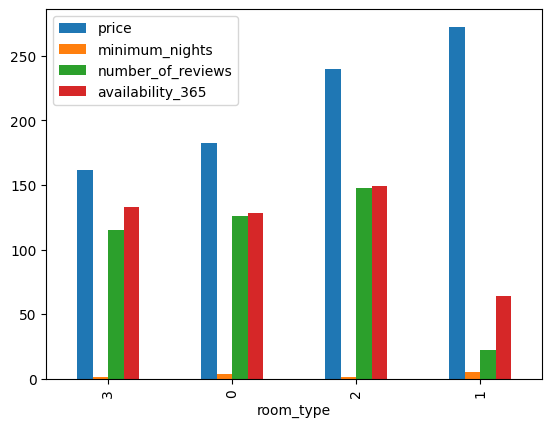

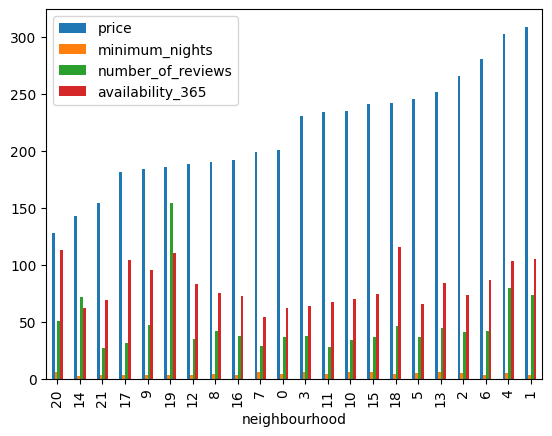

In [6]:
summary_ROOM.plot.bar()
summary_neghbourhood.plot.bar()

# **Plot the correlations between features of the neighbourhood type**

<Axes: >

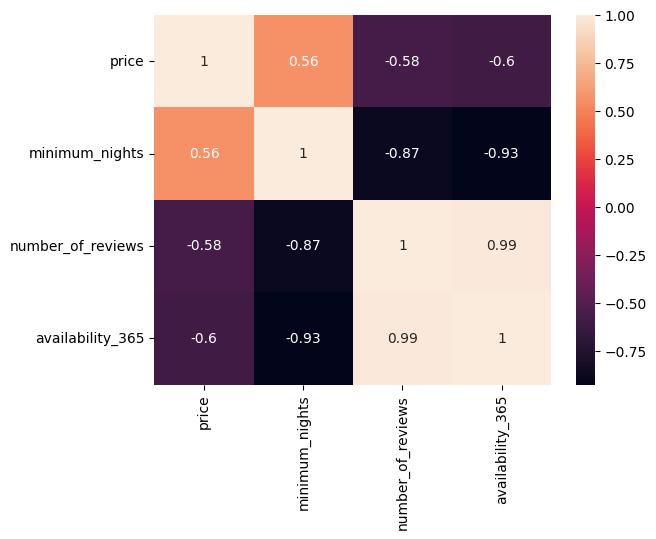

In [7]:
import seaborn as sns
sns.heatmap(summary_ROOM.corr(), annot=True)

,price,minimum_nights,availability_365
room_type,,,
3,161.674419,1.465116,132.953488
0,182.154693,3.411356,128.552144
2,240.142857,1.357143,149.017857
1,272.403251,5.423310,63.903164


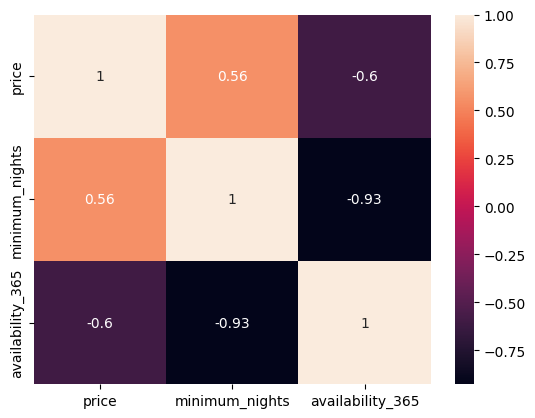

In [8]:
# we notice a high correlation between the number of reviews and the availability of the room
summary_ROOM.pop("number_of_reviews")
sns.heatmap(summary_ROOM.corr(), annot=True)
summary_ROOM.head()

# **Plot the correlations between features of the neighbourhood type**

<Axes: >

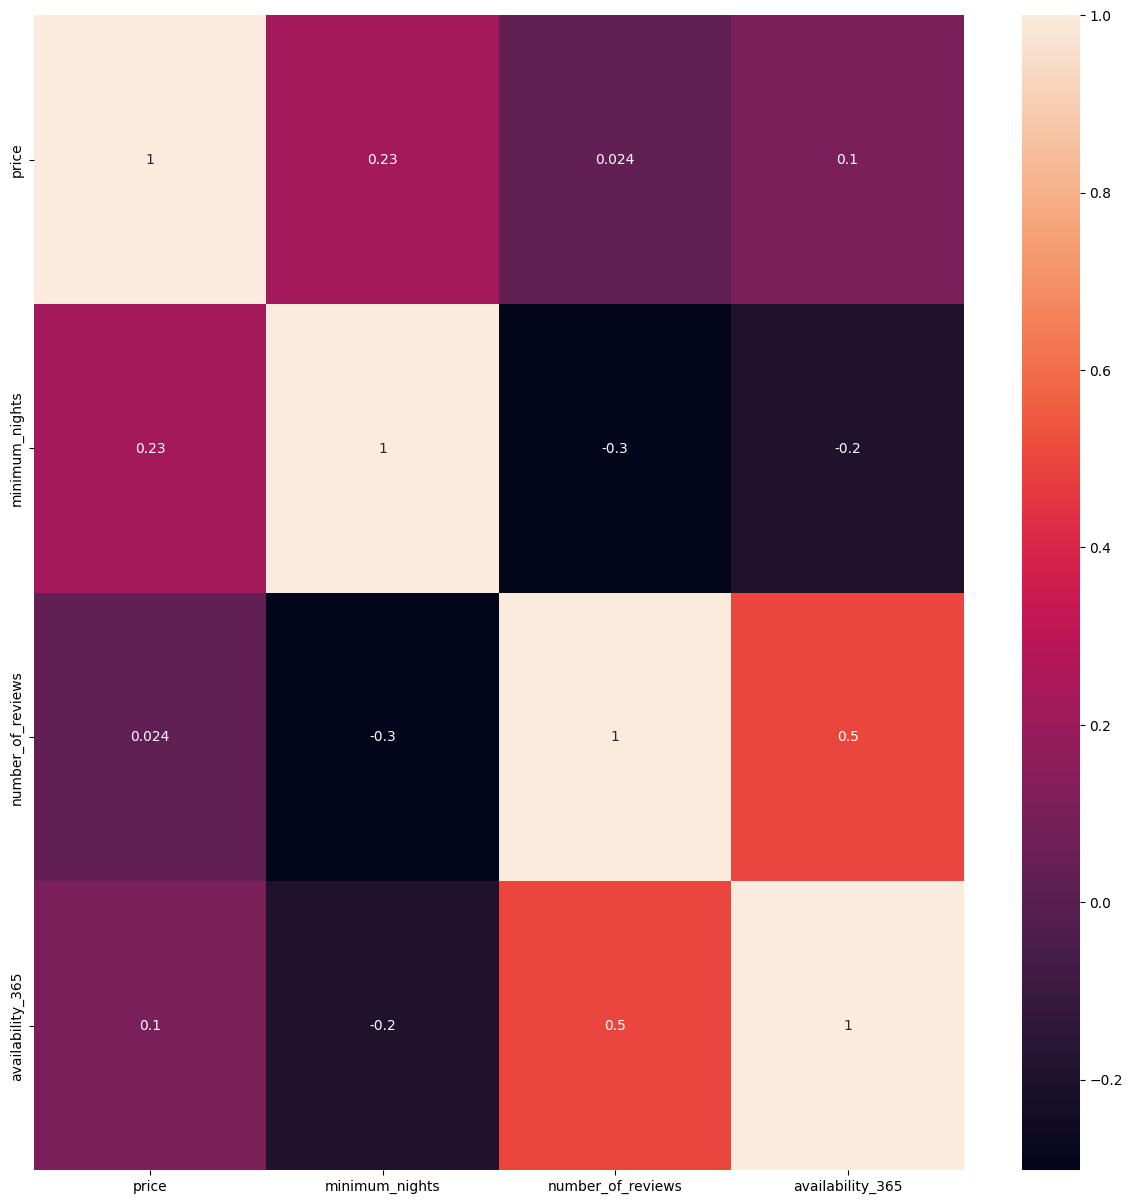

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(summary_neghbourhood.corr(), annot=True)

<Axes: >

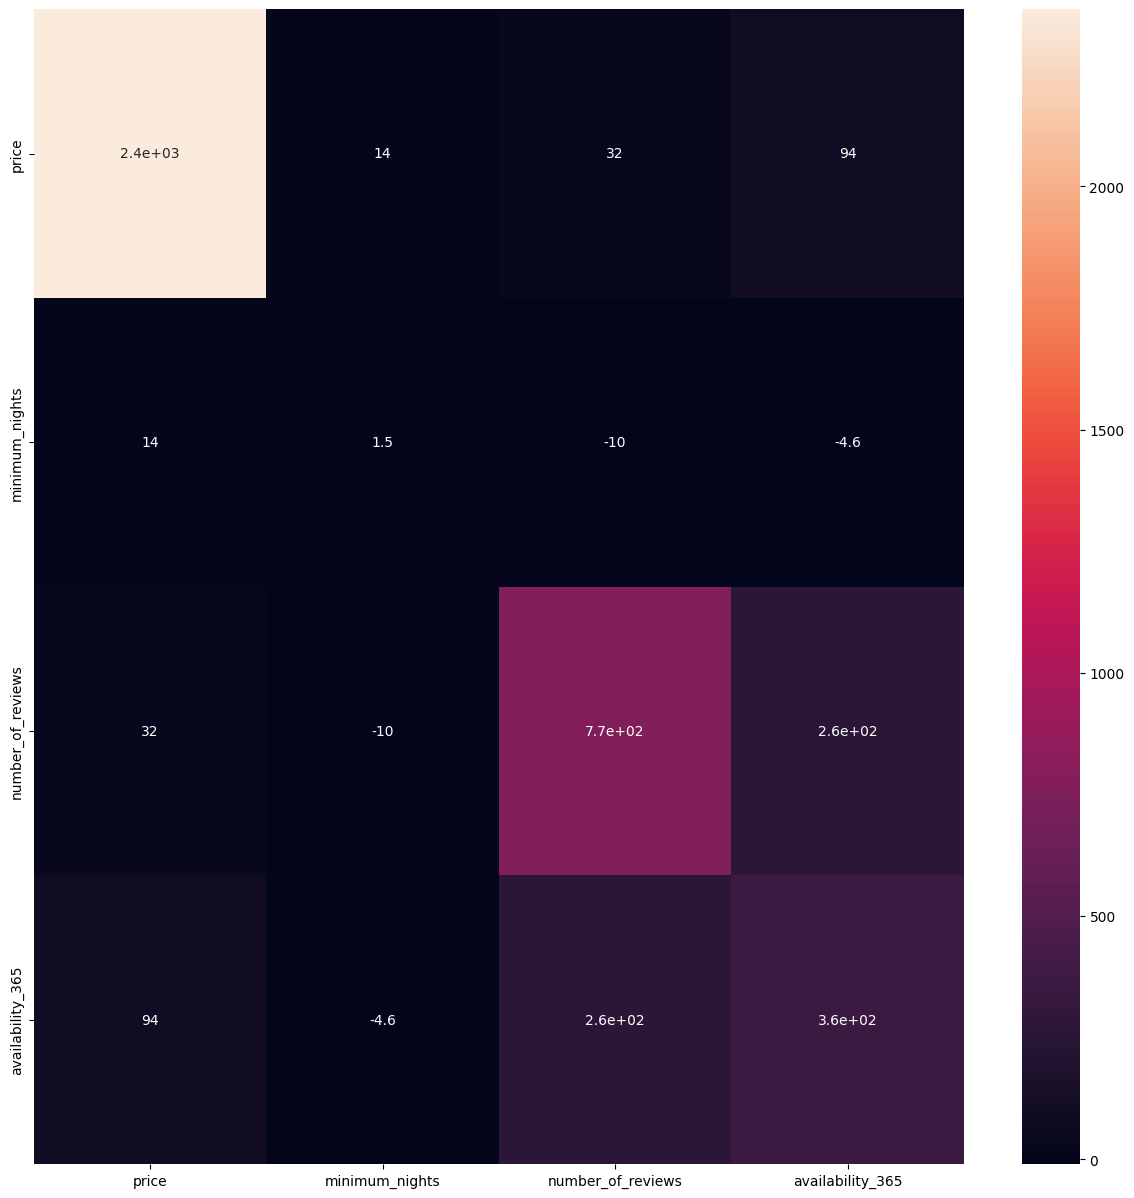

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(summary_neghbourhood.cov(), annot=True)

# **Plot the relations between Room type and pice**

the most popular room type is Entire home/apt while the most popular neghbourhood is De Baarsjes - Oud-West


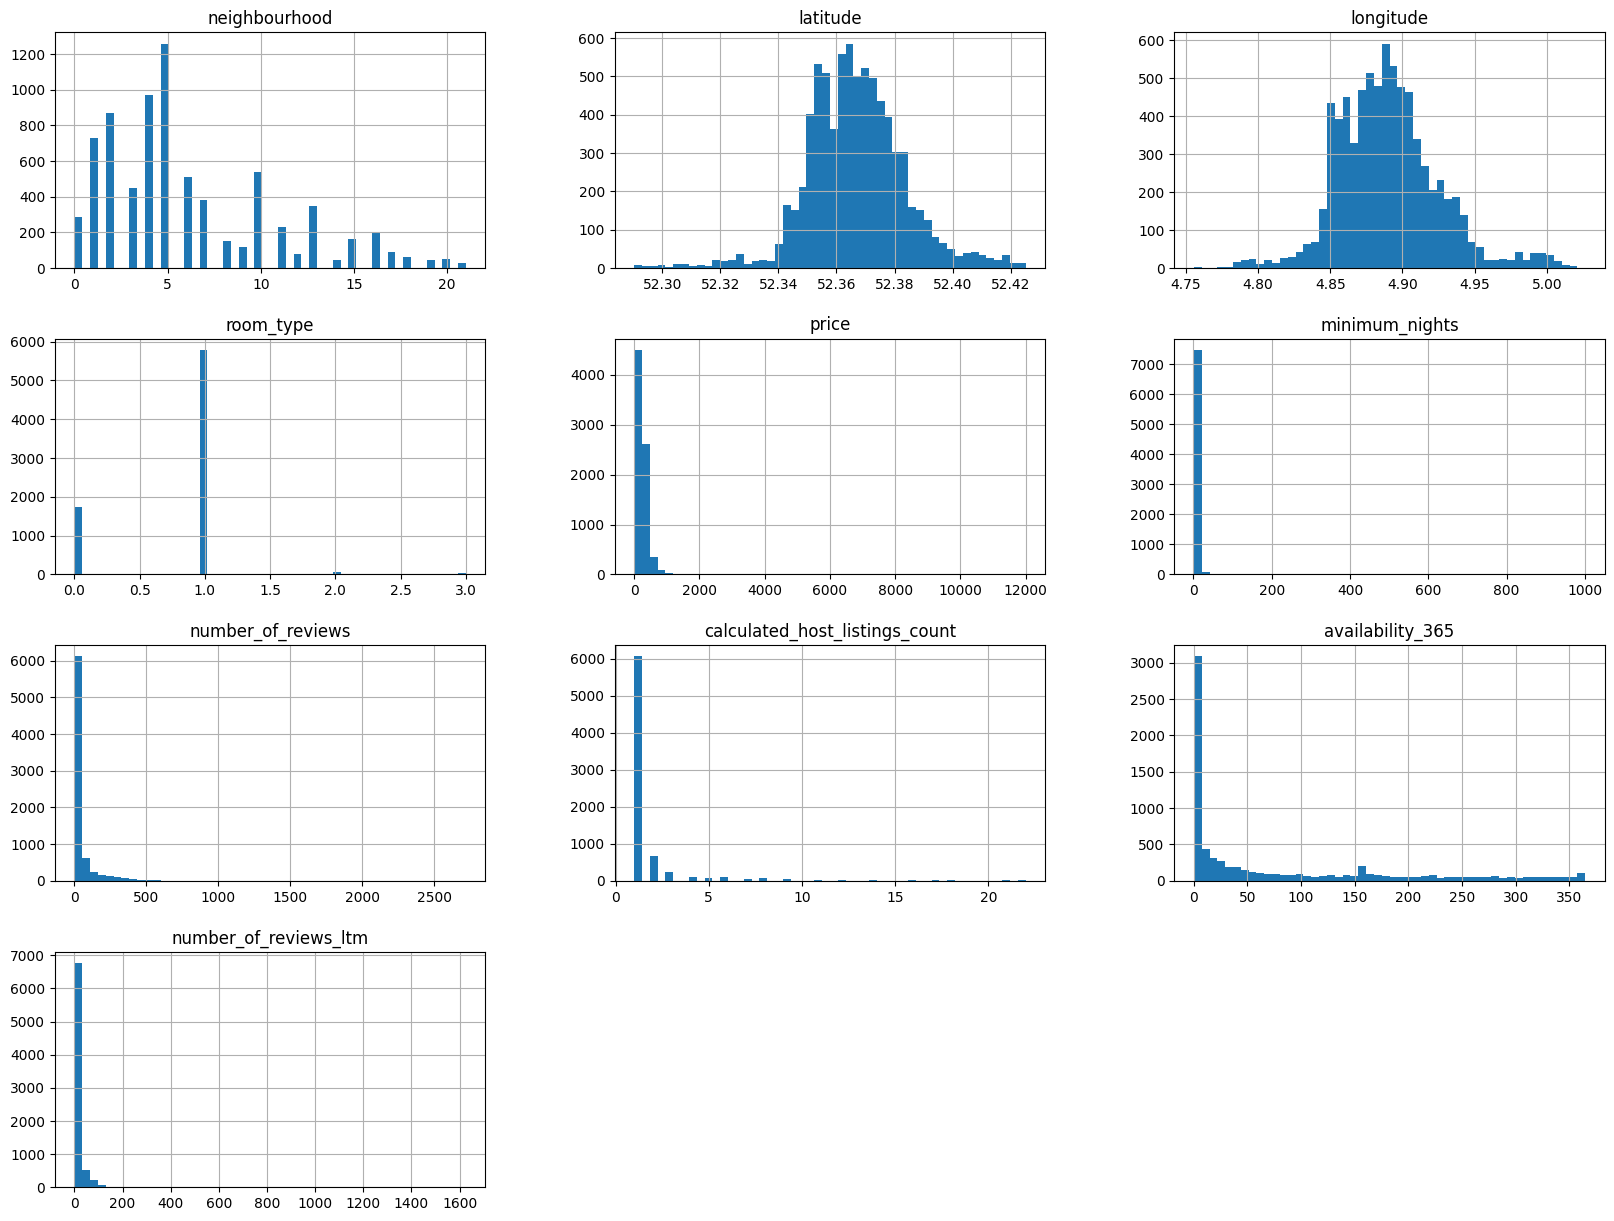

In [11]:
airBnbData.hist(bins=50, figsize=(20,15))
#from the graph we notice that the most popular neghbourhood is the 5 and the most popular room type is the 1
print(f"the most popular room type is {RoomType[1]} while the most popular neghbourhood is {neighbourhood[5]}")

c:\Users\Ebrah\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

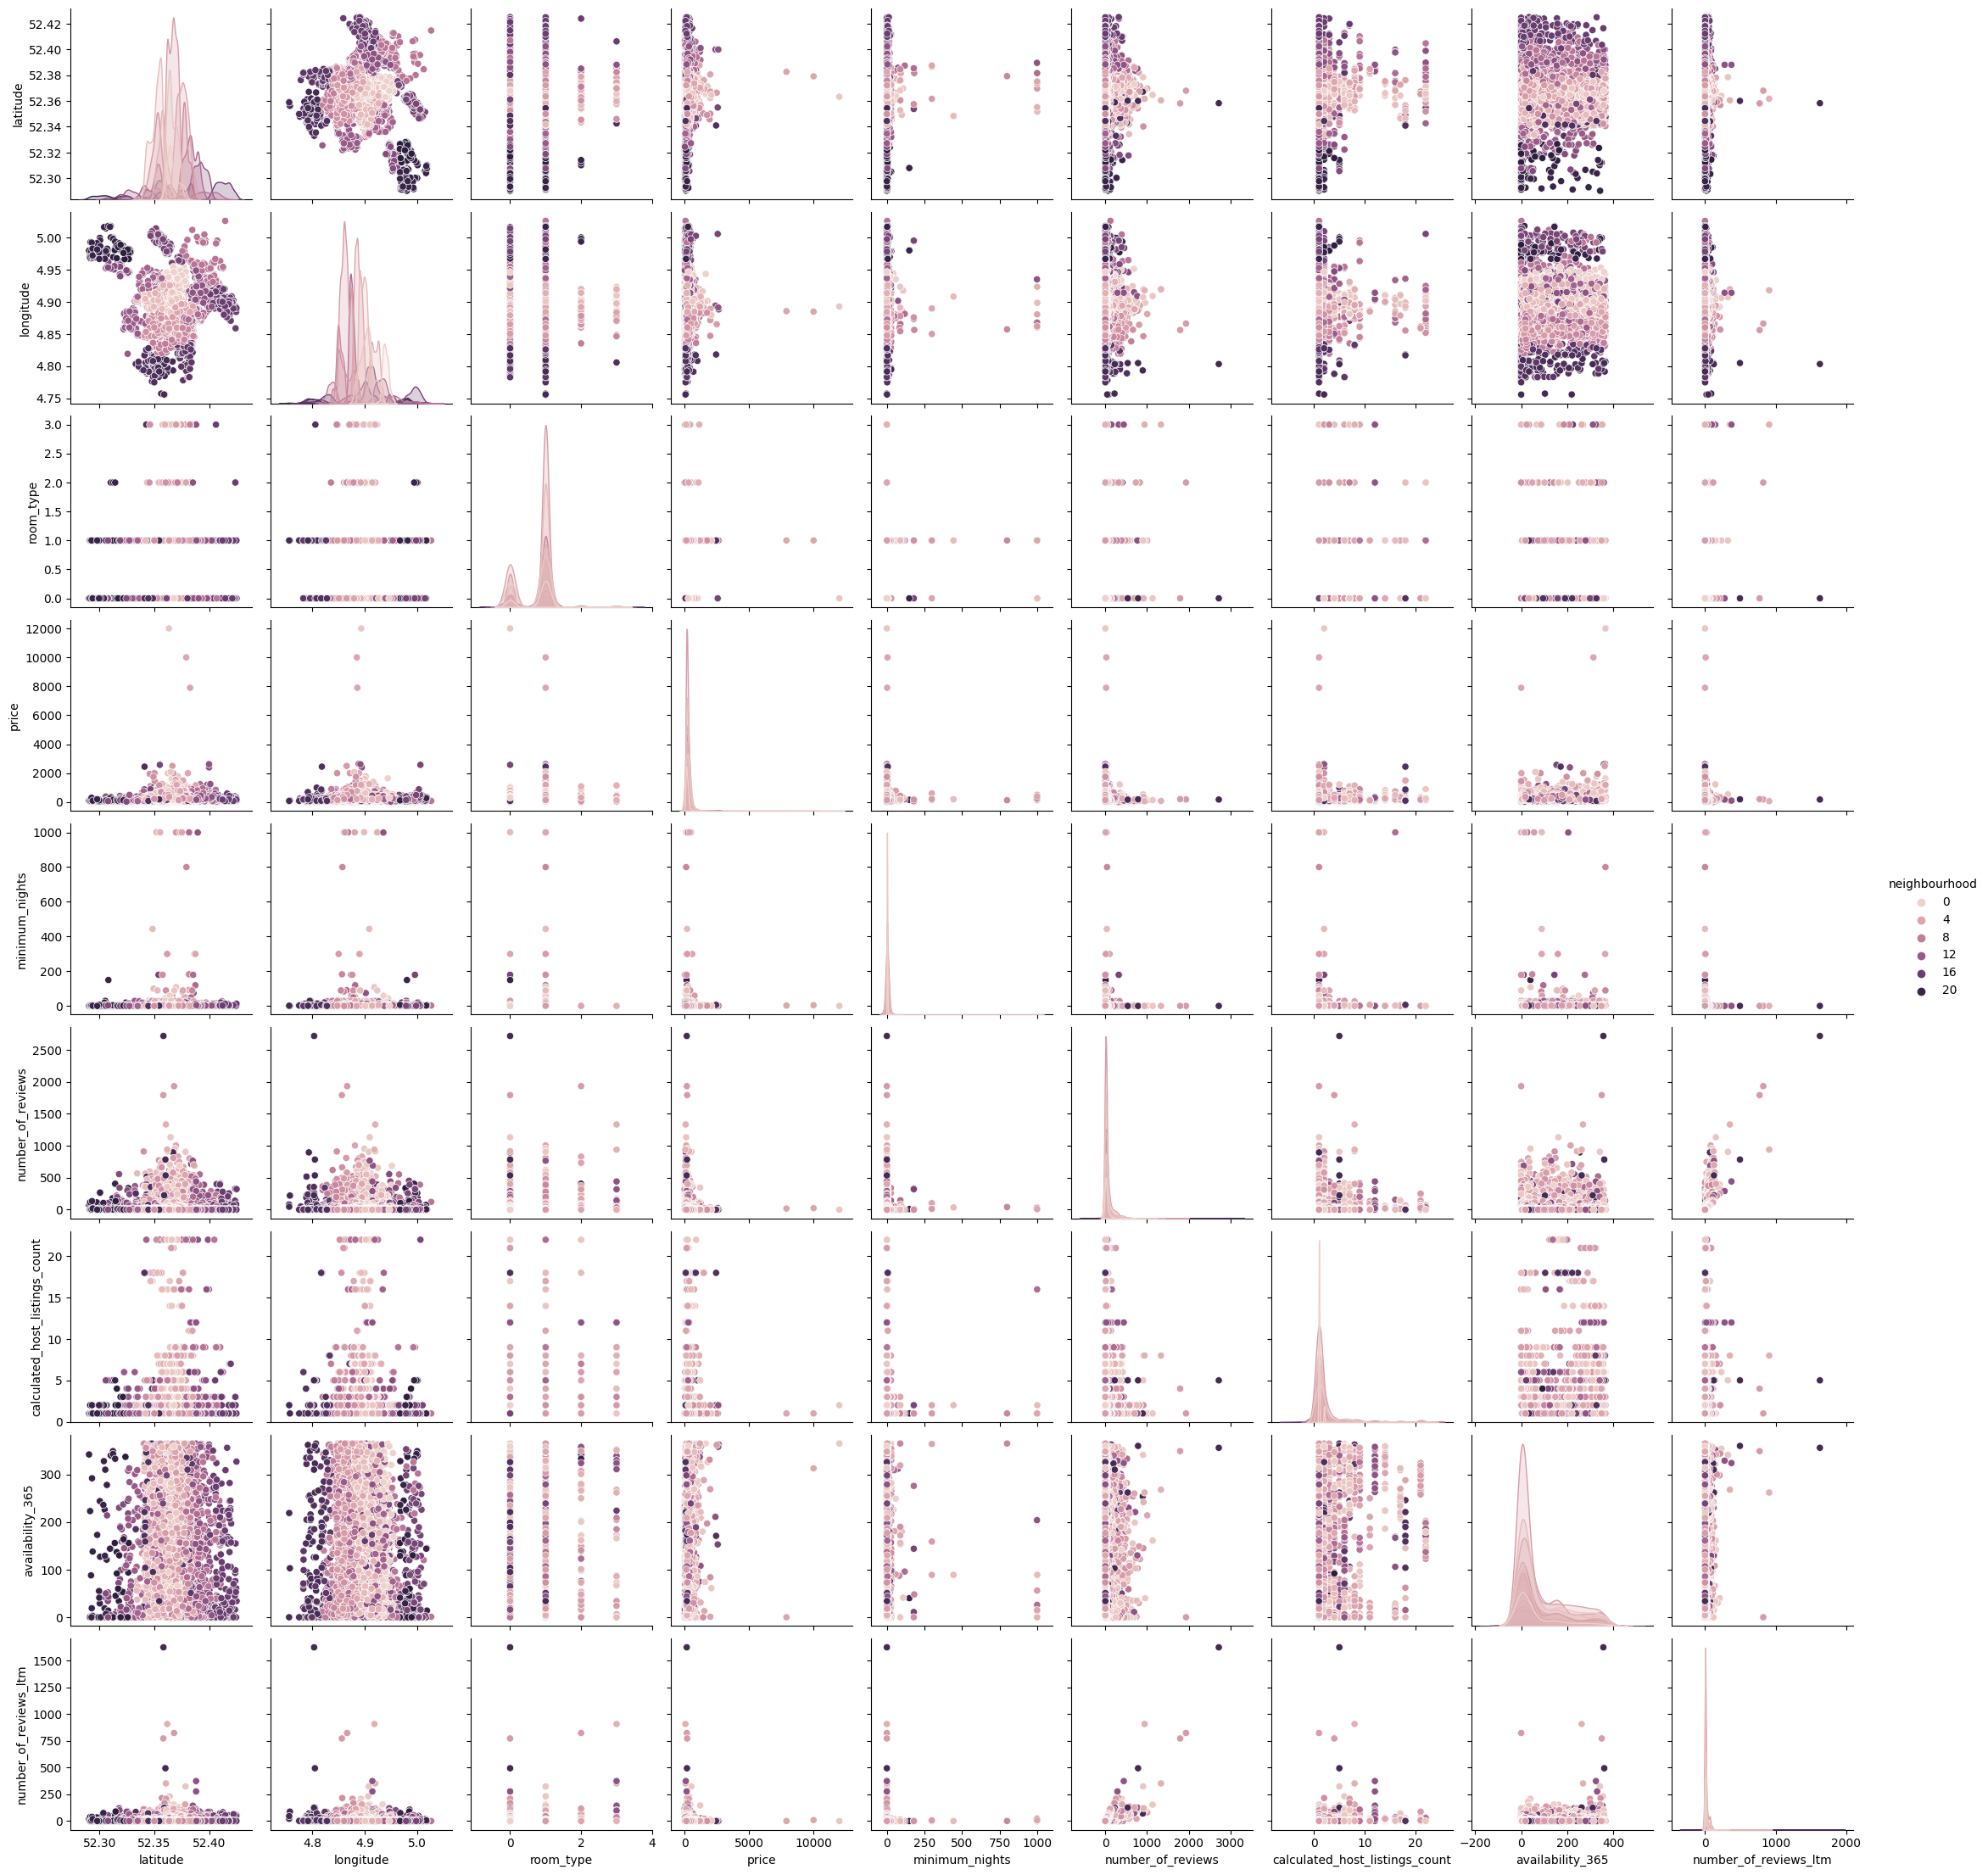

In [12]:

#pair plot whith realation between neighbourhood
# to study the best neighbor hood for me
plt.figure(figsize=(15,15))
sns.pairplot(data=airBnbData,hue="neighbourhood")



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'Relation between neighbourhood and price'}, xlabel='neighbourhood', ylabel='price'>

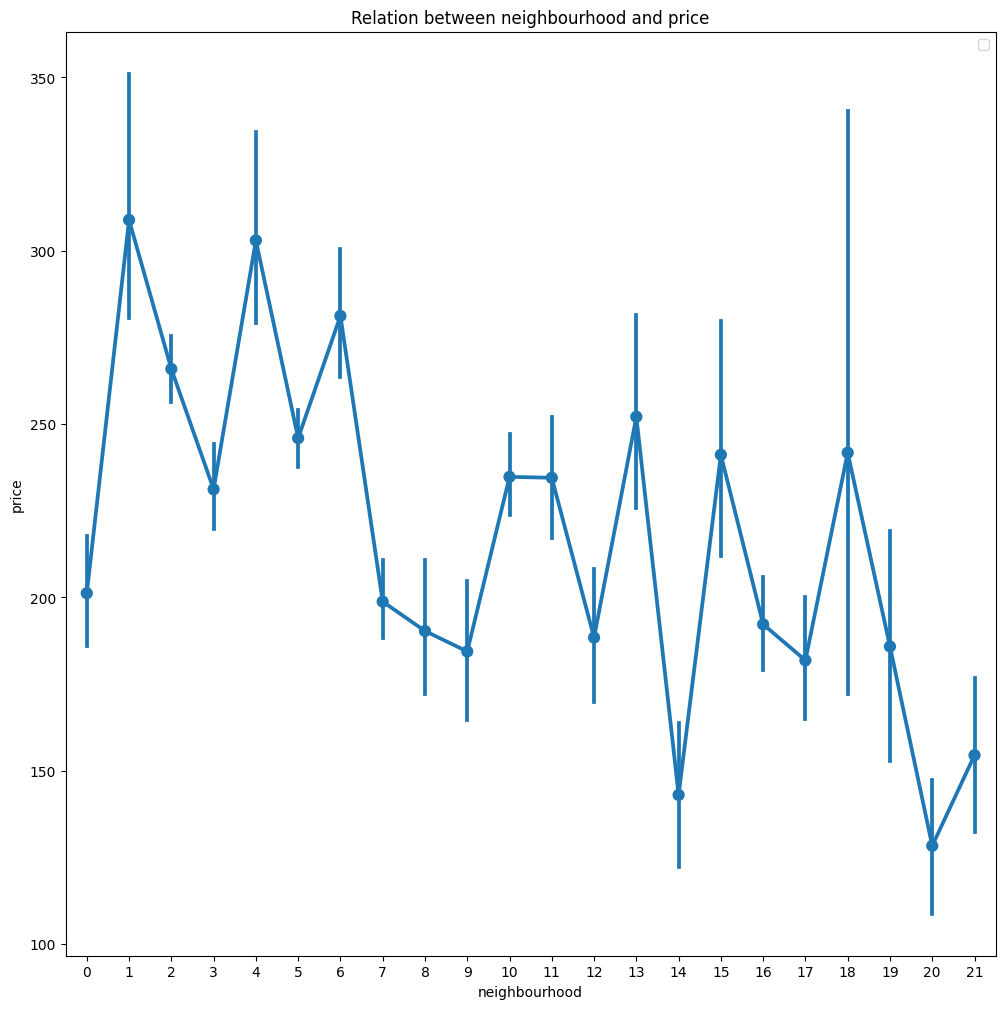

In [13]:
plt.figure(figsize=(12,12))
plt.title("Relation between neighbourhood and price")
plt.legend()
sns.pointplot(x=airBnbData["neighbourhood"],y=airBnbData["price"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'Relation between neighbourhood and number_of_reviews'}, xlabel='neighbourhood', ylabel='number_of_reviews'>

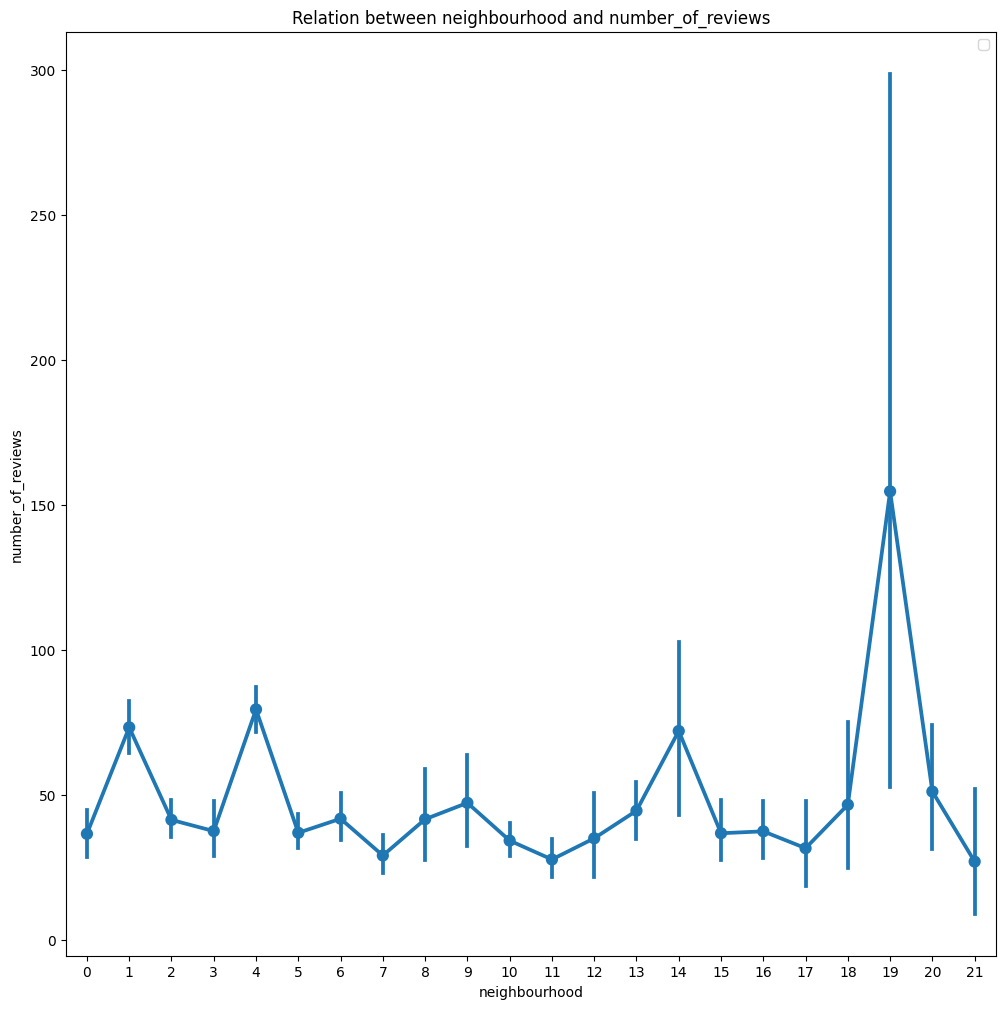

In [14]:
plt.figure(figsize=(12,12))
plt.title("Relation between neighbourhood and number_of_reviews")
plt.legend()
sns.pointplot(x=airBnbData["neighbourhood"],y=airBnbData["number_of_reviews"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'Relation between neighbourhood and number_of_reviews'}, xlabel='room_type', ylabel='price'>

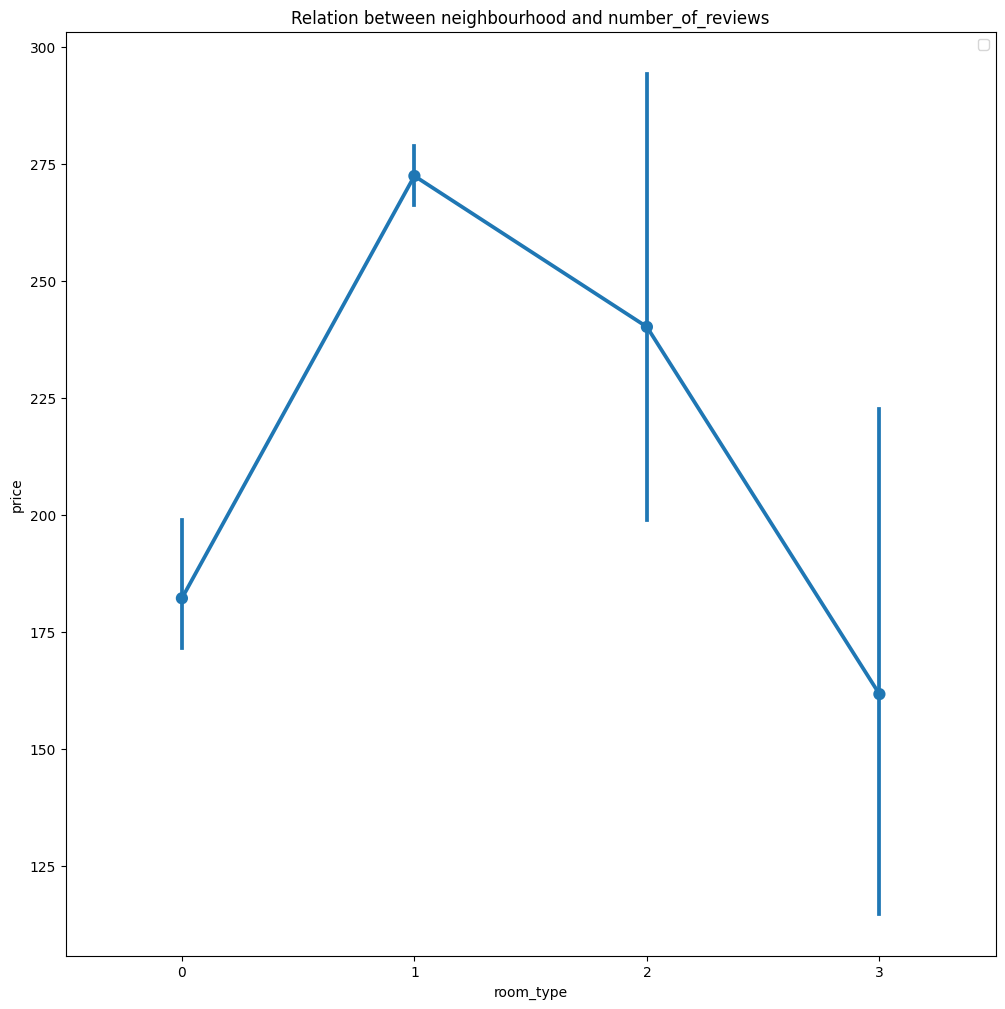

In [19]:
plt.figure(figsize=(12,12))
plt.title("Relation between neighbourhood and number_of_reviews")
plt.legend()
sns.pointplot(x=airBnbData["room_type"],y=airBnbData["price"])

C:\Users\Ebrah\AppData\Local\Temp\ipykernel_17912\1329174545.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airBnbData["neighbourhood"])


<Axes: xlabel='neighbourhood', ylabel='Density'>

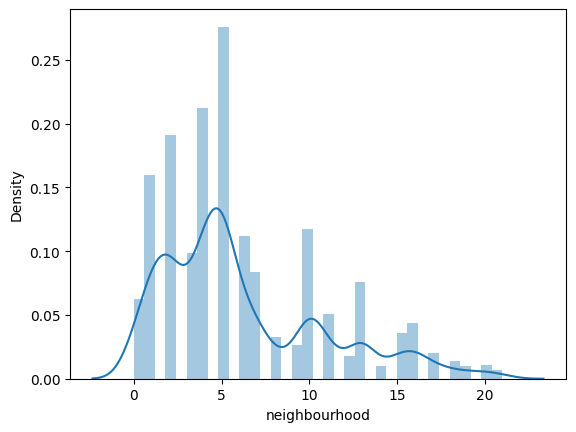

In [22]:
sns.distplot(airBnbData["neighbourhood"])